<a href="https://colab.research.google.com/github/Hadavand-s-Minions/rsna-cervical-spine/blob/main/notebooks/Cervical_Spine_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Necessary Libraries And Modules

These are the libraries we will need for EDA, preprocessing image data, splitting the data, computing accuracy and improving model performance

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from PIL import Image

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

# from sklearn import decomposition 
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.svm import LinearSVC 
# from sklearn.linear_model import LogisticRegression, SGDClassifier

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, ParameterGrid

### Mount Files from Google Drive to Read Image and Variable data for analysis

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# set the theme for EDA
sns.set_theme(palette='muted')

## EDA on Metadata For Test Set

The image data is stored in 2019 image directories where each directory contains a certain number of images from a given scan. For each of these directories, the train.csv is a file with metadata that describes whether all the images in that directory correspond to having a fracture based the scans of the cervical spine.

Specifically, for given row, we have the variables show in the table below and each of the variables is explained in the github repository under project_codebook. An example is: if row 1 has C1 =1 and C2 - C7 = 0, then there is a fracture in one vertebrae and therefore overall fracture for the patient. This applies to all the images in that directory in row 1

In [ ]:
metadat = pd.read_csv('/content/gdrive/MyDrive/Tutorial_Session/train.csv')
metadat.head()

,slice_path,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7,slice_id,width,height
0,../input/rsna-2022-cervical-spine-fracture-det...,1.2.826.0.1.3680043.17625,1,0,1,0,0,0,0,0,12,512,512
1,../input/rsna-2022-cervical-spine-fracture-det...,1.2.826.0.1.3680043.17625,1,0,1,0,0,0,0,0,210,512,512
2,../input/rsna-2022-cervical-spine-fracture-det...,1.2.826.0.1.3680043.17625,1,0,1,0,0,0,0,0,120,512,512
3,../input/rsna-2022-cervical-spine-fracture-det...,1.2.826.0.1.3680043.17625,1,0,1,0,0,0,0,0,208,512,512
4,../input/rsna-2022-cervical-spine-fracture-det...,1.2.826.0.1.3680043.17625,1,0,1,0,0,0,0,0,141,512,512


In [ ]:
# get summary statistics for all the columns
metadat.describe(include='all')

,slice_path,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7,slice_id,width,height
count,711601,711601,711601.000000,711601.000000,711601.000000,711601.000000,711601.000000,711601.000000,711601.000000,711601.000000,711601.000000,711601.000000,711601.000000
unique,711601,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,../input/rsna-2022-cervical-spine-fracture-det...,1.2.826.0.1.3680043.20756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.450982,0.067459,0.127209,0.035374,0.051190,0.079213,0.132415,0.185012,201.459901,512.283736,512.281326
std,NaN,NaN,0.497592,0.250816,0.333207,0.184723,0.220386,0.270071,0.338942,0.388308,143.653159,8.482687,8.481772
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,512.000000,512.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,512.000000,512.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,177.000000,512.000000,512.000000
75%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,281.000000,512.000000,512.000000


In [ ]:
# drop columns we don't need
columns = ["slice_path", "width", "height", "slice_path"]
metadat = metadat.drop(columns, axis=1)
metadat.head()

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7,slice_id
0,1.2.826.0.1.3680043.17625,1,0,1,0,0,0,0,0,12
1,1.2.826.0.1.3680043.17625,1,0,1,0,0,0,0,0,210
2,1.2.826.0.1.3680043.17625,1,0,1,0,0,0,0,0,120
3,1.2.826.0.1.3680043.17625,1,0,1,0,0,0,0,0,208
4,1.2.826.0.1.3680043.17625,1,0,1,0,0,0,0,0,141


In [ ]:
# check for null values
metadat.isnull().sum()

StudyInstanceUID    0
patient_overall     0
C1                  0
C2                  0
C3                  0
C4                  0
C5                  0
C6                  0
C7                  0
slice_id            0
dtype: int64

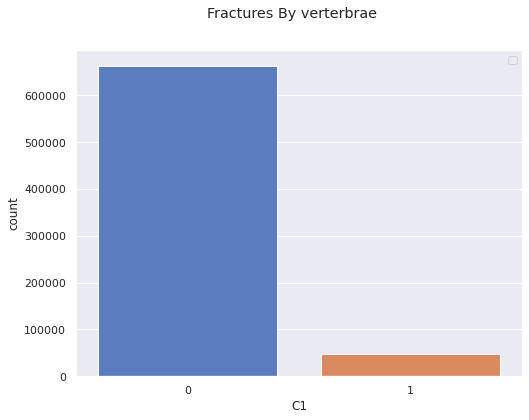

In [ ]:
# data distrubution by classes
fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(x="C1", data=metadat, 
            ax=ax)
ax.set_xlabel("C1")
ax.legend()

fig.suptitle("Fractures By verterbrae");

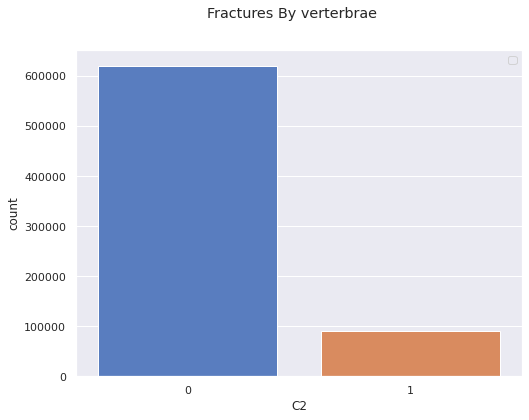

In [ ]:
# data distrubution by classes
fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(x="C2", data=metadat, 
            ax=ax)
ax.set_xlabel("C2")
ax.legend()

fig.suptitle("Fractures By verterbrae");

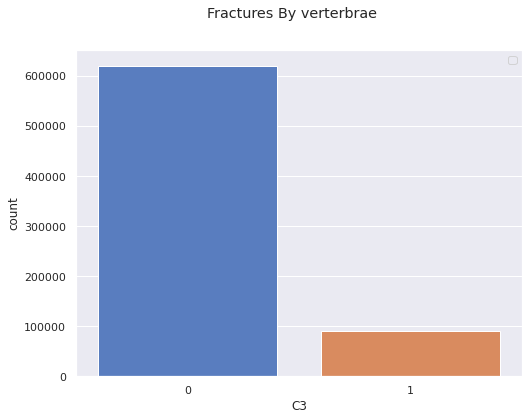

In [ ]:
# data distrubution by classes
fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(x="C2", data=metadat, 
            ax=ax)
ax.set_xlabel("C3")
ax.legend()

fig.suptitle("Fractures By verterbrae");

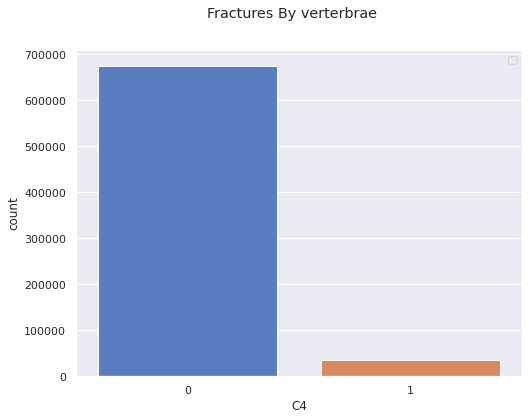

In [ ]:
# data distrubution by classes
fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(x="C4", data=metadat, 
            ax=ax)
ax.set_xlabel("C4")
ax.legend()

fig.suptitle("Fractures By verterbrae");

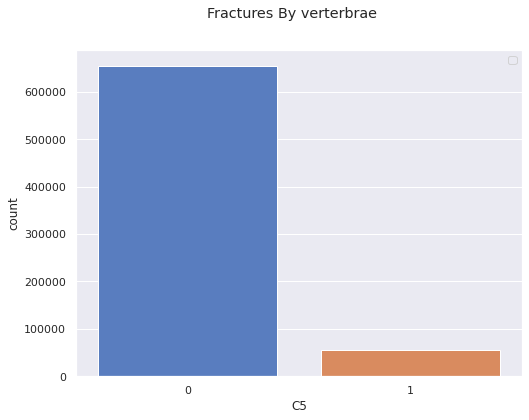

In [ ]:
# data distrubution by classes
fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(x="C5", data=metadat, 
            ax=ax)
ax.set_xlabel("C5")
ax.legend()

fig.suptitle("Fractures By verterbrae");

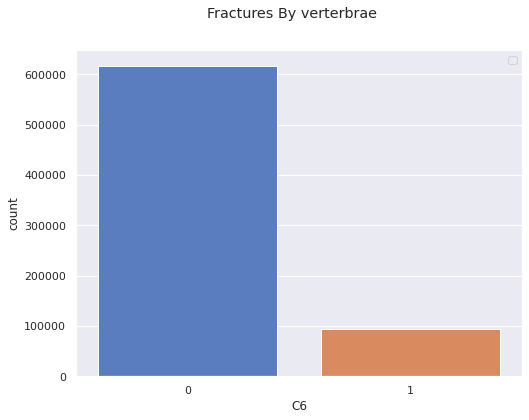

In [ ]:
# data distrubution by classes
fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(x="C6", data=metadat, 
            ax=ax)
ax.set_xlabel("C6")
ax.legend()

fig.suptitle("Fractures By verterbrae");

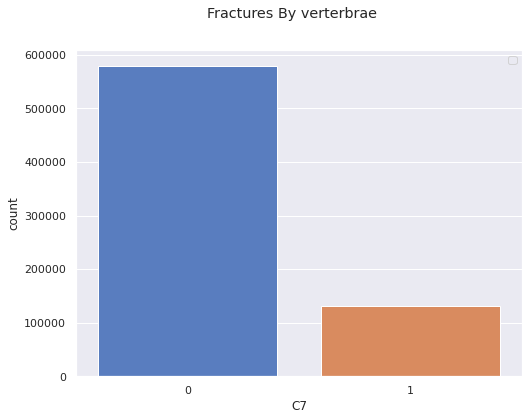

In [ ]:
# data distrubution by classes
fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(x="C7", data=metadat, 
            ax=ax)
ax.set_xlabel("C7")
ax.legend()

fig.suptitle("Fractures By verterbrae");

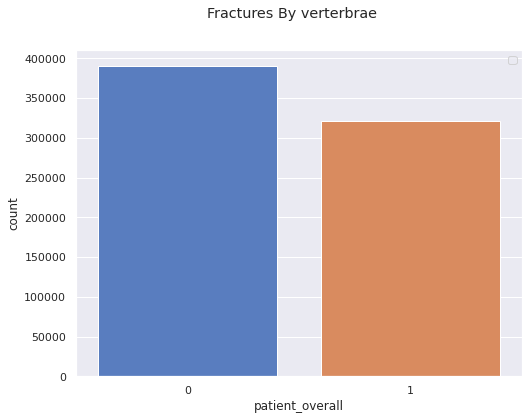

In [ ]:
# data distrubution by classes
fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(x="patient_overall", data=metadat, 
            ax=ax)
ax.set_xlabel("patient_overall")
ax.legend()

fig.suptitle("Fractures By verterbrae");

## Image Visualization
C1 - C5

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def rand_clothes(path, number, random_state):
    '''Function to load the images and randomly select a given size of images
        path: which folder the images are in
        number: how many images to to select
        random_state: seed to make the results reproducible
    '''
    #set a seed
    np.random.seed(random_state)
    
    #read the files from the path and randomly select a given number
    files = os.scandir(path)
    files = [i.name for i in files]
    return np.random.choice(files, size=number, replace=False)

files_j = rand_clothes("/content/gdrive/MyDrive/Tutorial_Session/hadavands_minions/train_images/1.2.826.0.1.3680043.14", 400, 123) 

In [ ]:
#code adopted from LBA assignment
def img_to_arr(imgs, path):
    #list to store images
    flattened = []
    
    # for each image combine the name with path 
    for img in imgs:
        # open it as a read file in binary mode
        with open(path+img, 'r+b') as f:
            # open it as an image
            with Image.open(f) as image:
                # resize the image to be more manageable
                #cover = resizeimage.resize_cover(image, [512, 512])
                cover = image.resize((360,360))
                flattened.append((np.array(cover).flatten(), 0))
                
    # Flatten it once more
    flattened = np.asarray(flattened)
    
    return flattened

In [ ]:
jerseys = img_to_arr(files_j, '/content/gdrive/MyDrive/Tutorial_Session/hadavands_minions/train_images/1.2.826.0.1.3680043.14/')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [1]:
#display some of the images
# initializing the subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 15))

#flatteen the axis
axs = axs.flatten()

# look at random selected jerseys
range_j = np.random.randint(0, len(jerseys), 10)
for p, ax in zip(range_j, axs):
    
    #resize the matrix to the same shape as the images and rotate
    ax.imshow(Image.fromarray(jerseys[p,0].reshape(360,360)))
    ax.set_title(f'Jersey Index: {p+1}', size=13)

NameError: ignored